 Setting up the Kaggle API for data access.

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Downloading the Heart Failure Clinical Dataset from Kaggle and unzips it.

In [ ]:
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 8.86MB/s]


Unzip the downloaded dataset

In [ ]:
!unzip /content/heart-failure-clinical-data.zip -d /content/heartfailure/

Archive:  /content/heart-failure-clinical-data.zip
  inflating: /content/heartfailure/heart_failure_clinical_records_dataset.csv  


Import necessary libraries and load the dataset using Pandas

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/heartfailure/heart_failure_clinical_records_dataset.csv")

Exploratory data analysis & Data Preprocessing

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


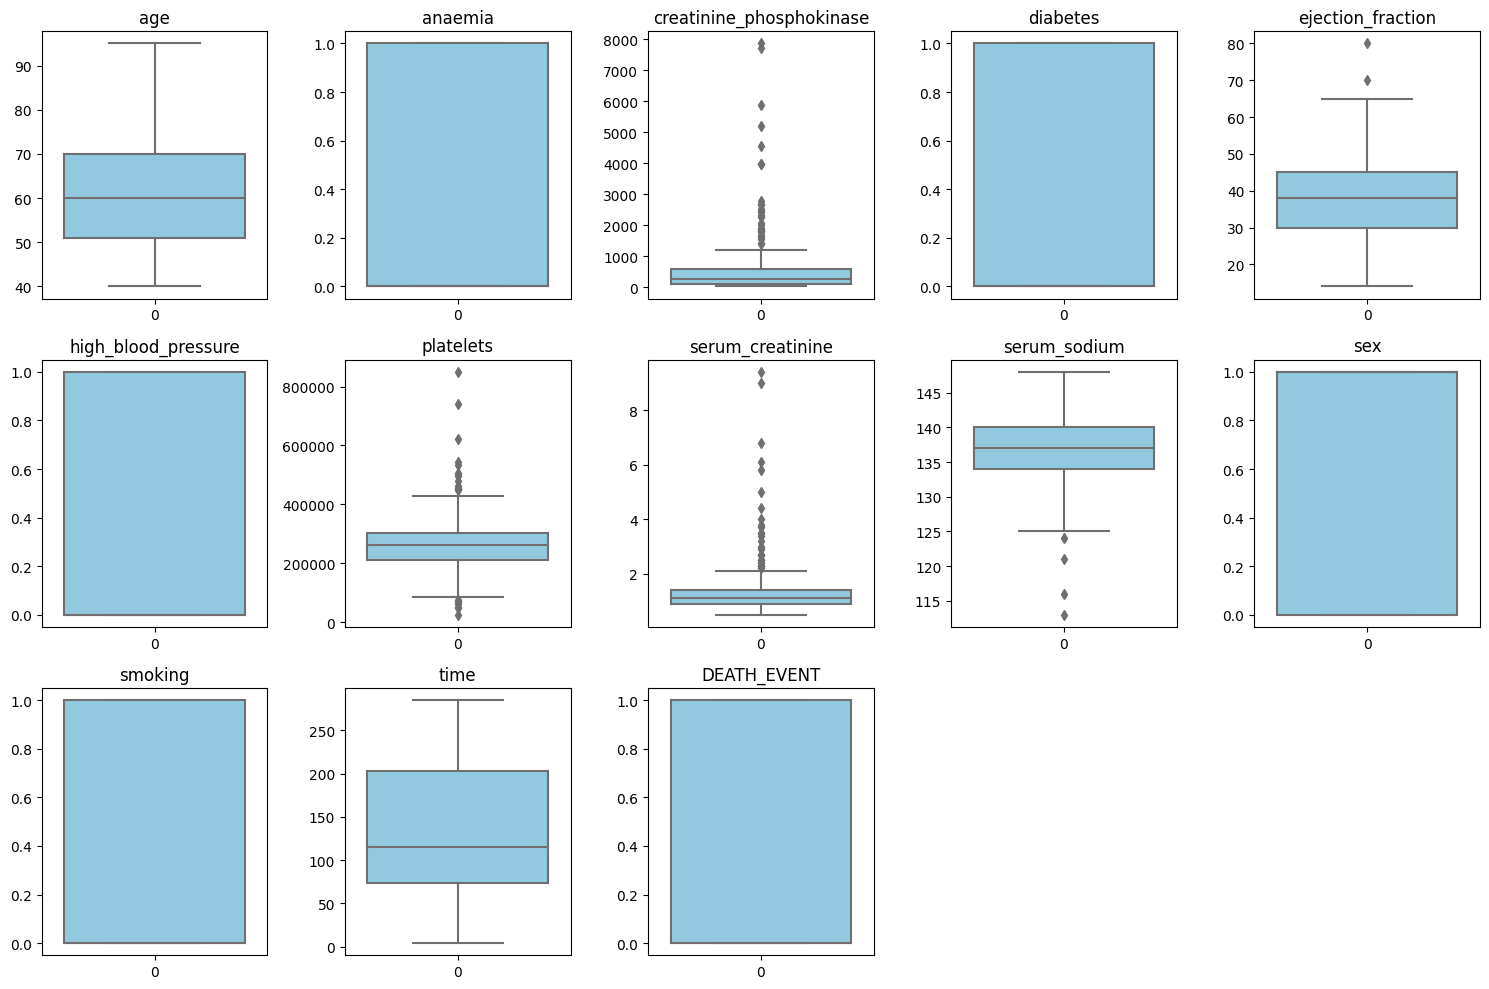

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
num_columns = len(df.columns)

num_rows = int(num_columns ** 0.5)
num_cols = int((num_columns + num_rows - 1) / num_rows)

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(column)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display the box plot grid
plt.show()

<Axes: >

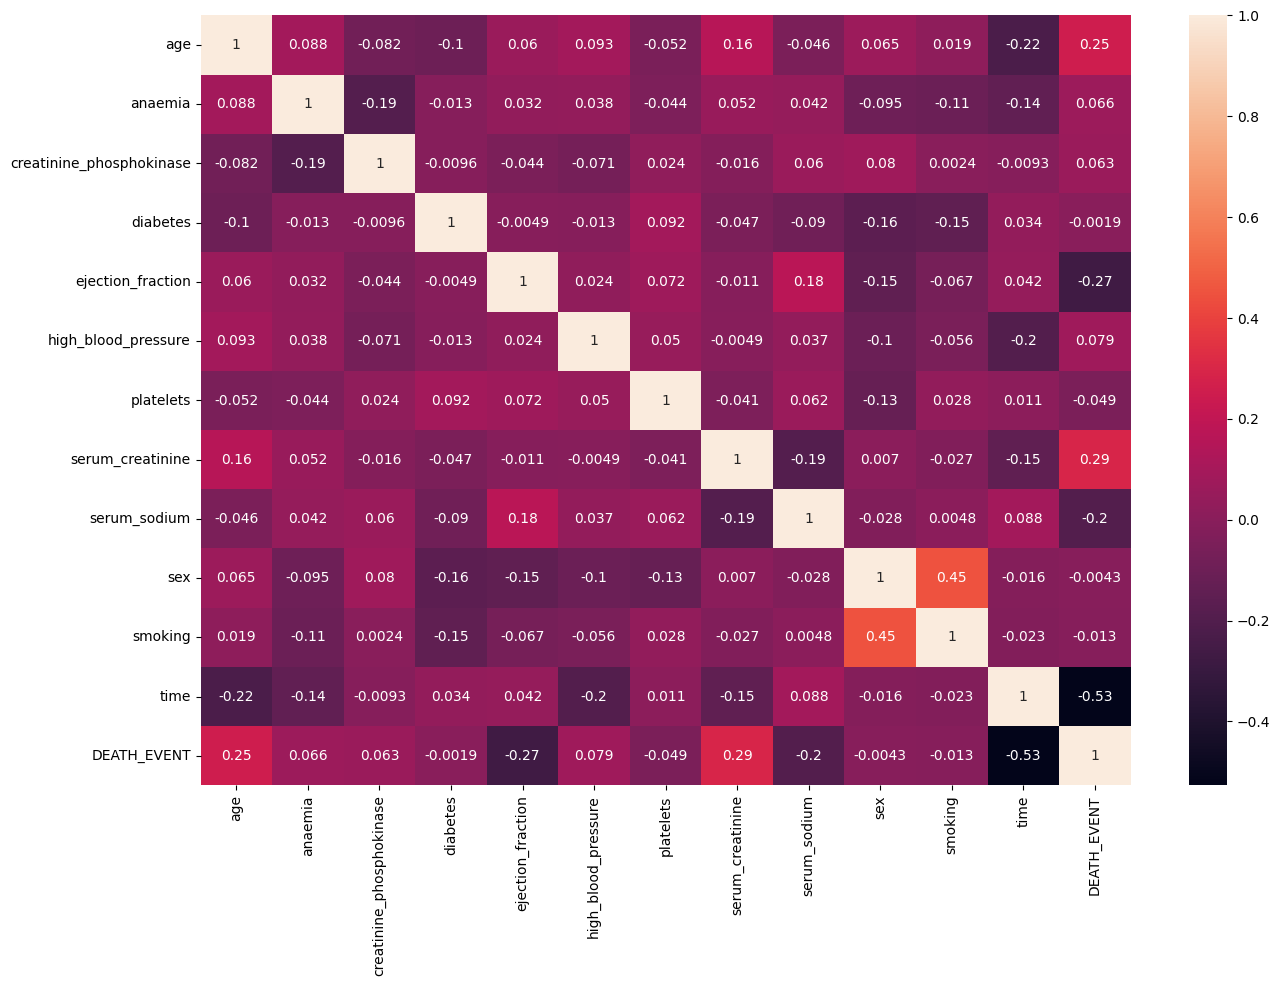

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(['anaemia','diabetes','high_blood_pressure','serum_creatinine','serum_sodium','sex','smoking'],axis=1,inplace=True)

<Axes: >

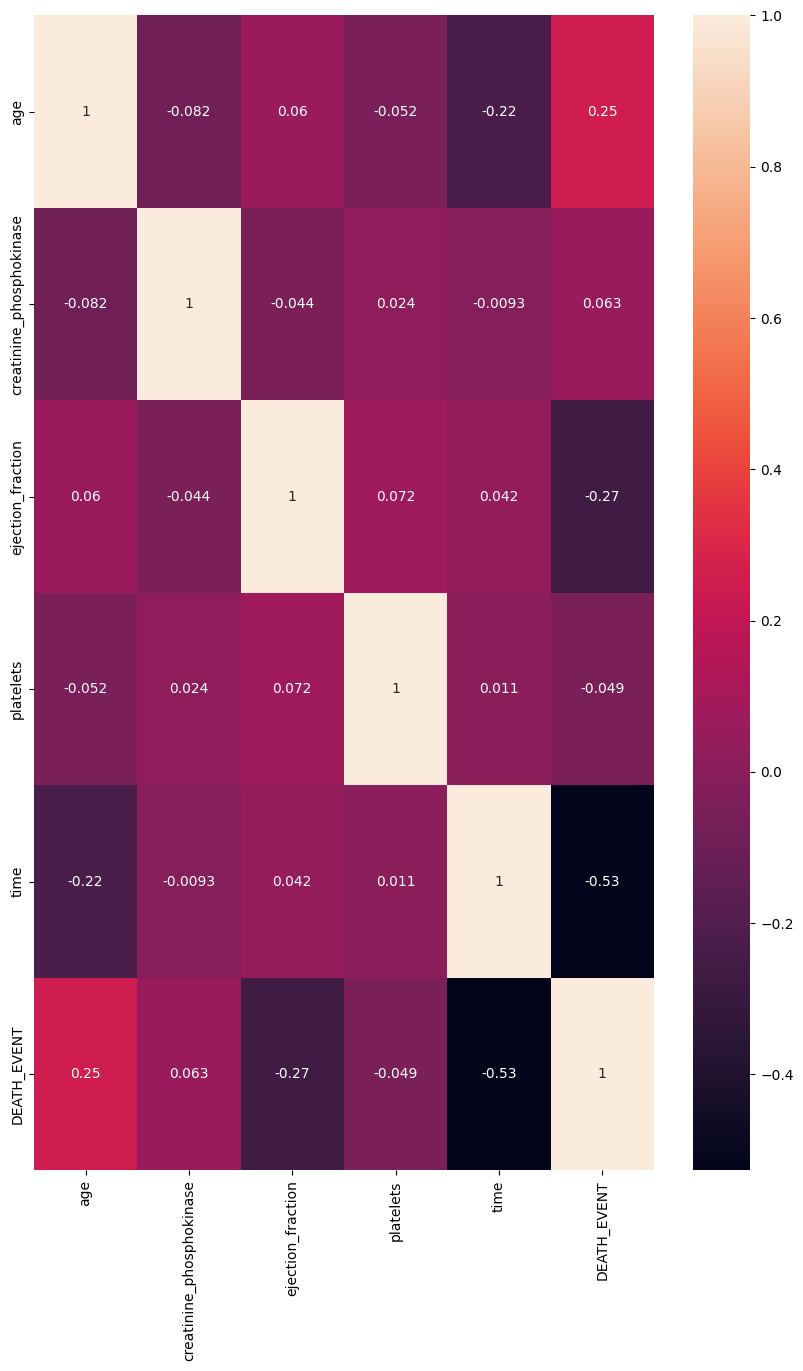

In [ ]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)

Defining the class to remove the outliers

In [ ]:
def remove_outliers(data, column):
  Q1 =data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 *IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'sex',
       'smoking', 'DEATH_EVENT'],
      dtype='object')

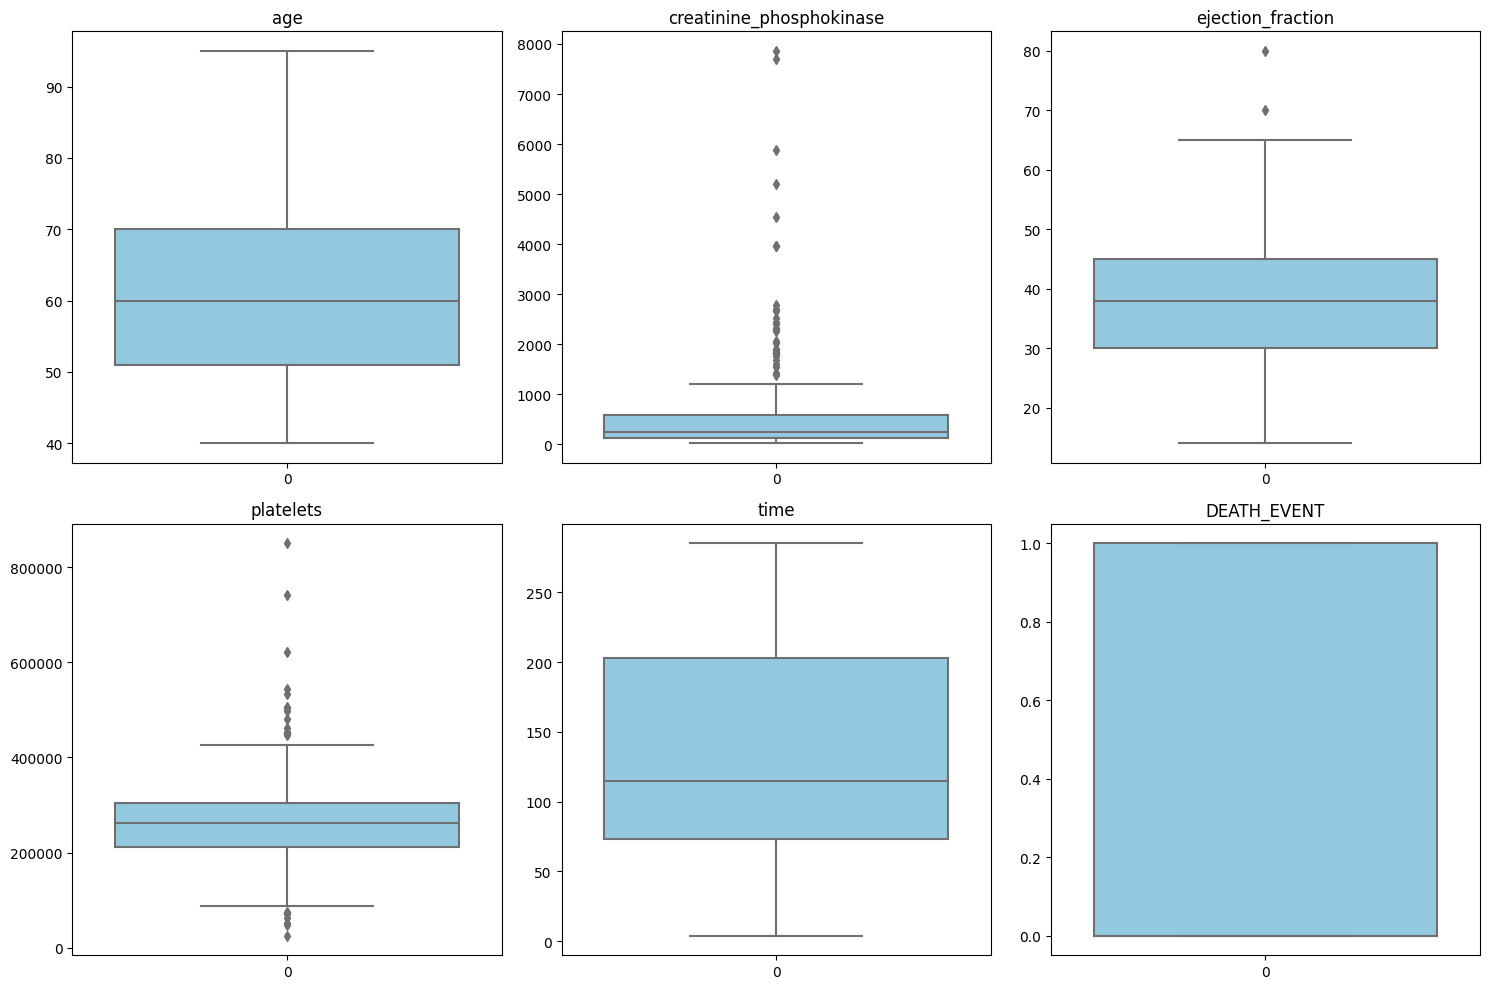

In [ ]:
plt.figure(figsize=(15, 10))
num_columns = len(df.columns)

num_rows = int(num_columns ** 0.5)
num_cols = int((num_columns + num_rows - 1) / num_rows)

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(column)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display the box plot grid
plt.show()

In [ ]:

outliercolumns = ['creatinine_phosphokinase','ejection_fraction','platelets']

In [ ]:
for column in outliercolumns:
    df = remove_outliers(df, column)

After removing the outlier data from our dataset

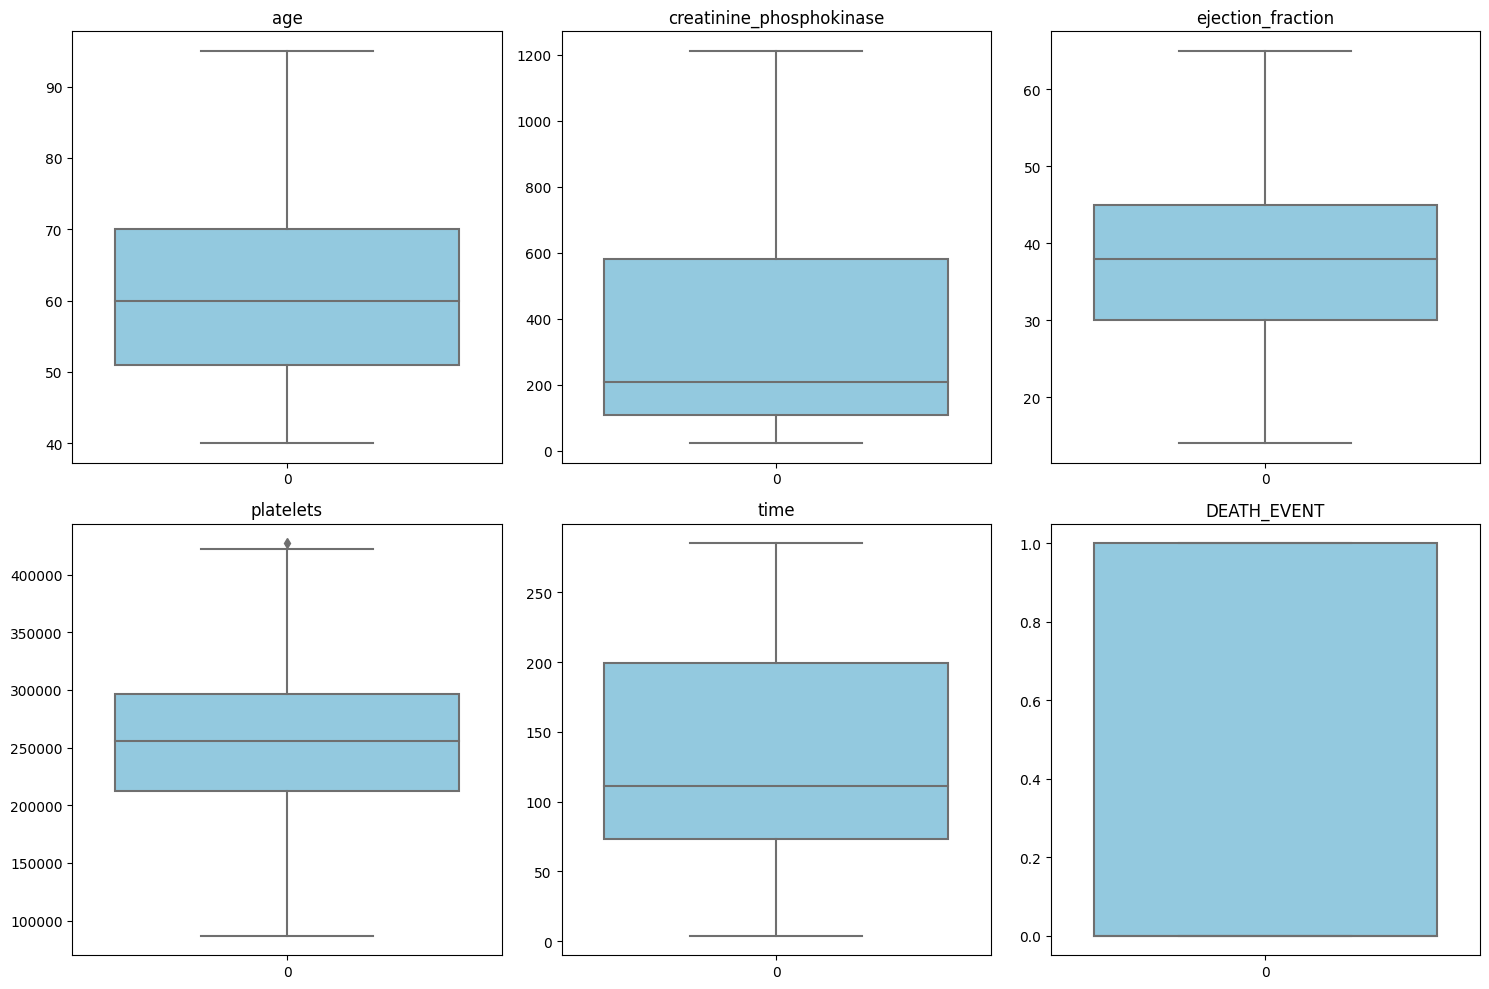

In [ ]:
plt.figure(figsize=(15, 10))
num_columns = len(df.columns)

num_rows = int(num_columns ** 0.5)
num_cols = int((num_columns + num_rows - 1) / num_rows)

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(column)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display the box plot grid
plt.show()

Split the dataset into features (x) and target (y).
Further split the data into training and testing sets using train_test_split()

In [ ]:
x = df.drop(['DEATH_EVENT'],axis=1)

In [ ]:
y = df.DEATH_EVENT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from numpy.random.mtrand import random_sample
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

Standardize the features using StandardScaler.
Train a Random Forest Classifier with standardized features.
Make predictions using the trained model and evaluate its accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
model = RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
prediction = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


Train a Logistic Regression model after standardizing the features.
Make predictions using the trained model and evaluate its accuracy.

In [ ]:
#Logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
model1 = LogisticRegression(random_state=42)
model1.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
lrprediction = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, lrprediction)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Randomforest classifier using Gridsearch (Hyper parameter tuning

In [ ]:
#Gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)

grid_search.fit(x_train_scaled, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
gridpredict = grid_search.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
lrprediction = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, gridpredict)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Train an AdaBoost Classifier using a base decision tree classifier.
Make predictions using the trained AdaBoost model and evaluate its accuracy.

In [ ]:
#adaboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Create the base decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


Train an LgBosst Classifier.Make predictions using the trained AdaBoost model and evaluate its accuracy.

In [ ]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(x_train_scaled,y_train)

lgpred = lgb_classifier.predict(x_test)

lgaccuracy = accuracy_score(y_test,lgpred)
print(f"Accuracy: {lgaccuracy:.2f}")


Accuracy: 0.76


Using XGBoost and predict the model

In [ ]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(booster='dart',random_state=42,max_depth)
xgboost.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgpred = xgboost.predict(x_test)
xgaccuracy = accuracy_score(y_test,xgpred)
print(f"Accuracy: {lgaccuracy:.2f}")

Accuracy: 0.76


In [ ]:
df.shape

(250, 6)

Among other classification algorithms ,adaboost performs very well. So we perform Hyperparameter tuning

In [ ]:
#adaboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Create the base decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
eval_set = [(x_test, y_test)]
# Train the AdaBoost classifier
adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Plotting the accuracy of training and testing dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


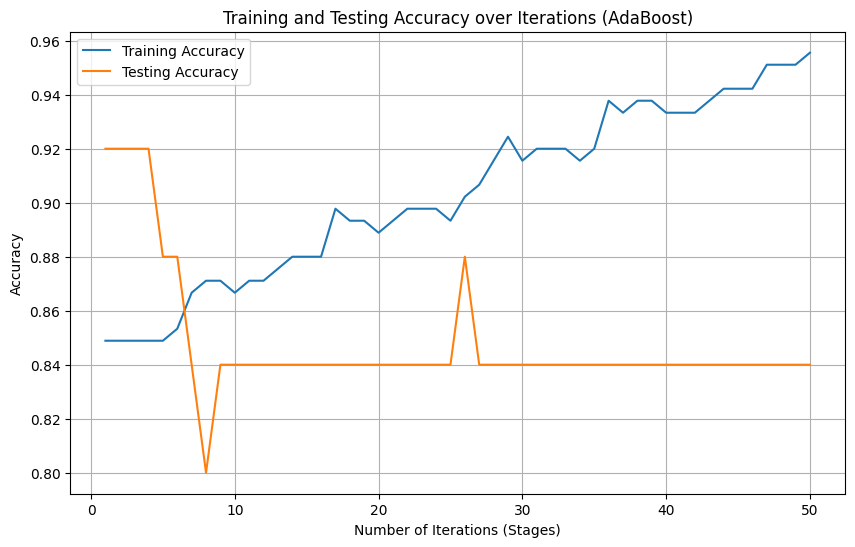

In [ ]:
# Get the training and testing accuracy at each iteration (stage)
train_accuracy = []
test_accuracy = []
for y_pred_train, y_pred_test in zip(adaboost.staged_predict(x_train), adaboost.staged_predict(x_test)):
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

# Plot the accuracy over iterations (stages)
plt.figure(figsize=(10, 6))
x_axis = np.arange(1, len(train_accuracy) + 1)
plt.plot(x_axis, train_accuracy, label="Training Accuracy")
plt.plot(x_axis, test_accuracy, label="Testing Accuracy")
plt.xlabel("Number of Iterations (Stages)")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Iterations (AdaBoost)")
plt.legend()
plt.grid(True)
plt.show()